# WSN DoS Attack Detection - Results Analysis

This notebook provides interactive analysis and visualization of the WSN DoS detection results.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. Load Results

In [12]:
# Load metrics for both datasets
wsn_ds_metrics = pd.read_csv('outputs/WSN-DS_metrics.csv')
wsn_bfsf_metrics = pd.read_csv('outputs/WSN-BFSF_metrics.csv')

print("WSN-DS Results:")
print(wsn_ds_metrics.to_string(index=False))
print("\nWSN-BFSF Results:")
print(wsn_bfsf_metrics.to_string(index=False))

WSN-DS Results:
             Model  Accuracy  Precision   Recall       F1
      RandomForest  0.997264   0.997290 0.997264 0.997252
               SVC  0.984680   0.985733 0.984680 0.984763
LogisticRegression  0.973390   0.974192 0.973390 0.973421
      EnsembleHard  0.988310   0.989245 0.988310 0.988371
      EnsembleSoft  0.996423   0.996488 0.996423 0.996418

WSN-BFSF Results:
             Model  Accuracy  Precision   Recall       F1
      RandomForest  0.999952   0.999952 0.999952 0.999952
               SVC  0.937987   0.914453 0.937987 0.908178
LogisticRegression  0.937330   0.916913 0.937330 0.909800
      EnsembleHard  0.939188   0.940005 0.939188 0.911032
      EnsembleSoft  0.948031   0.949431 0.948031 0.927385


## 2. Performance Comparison

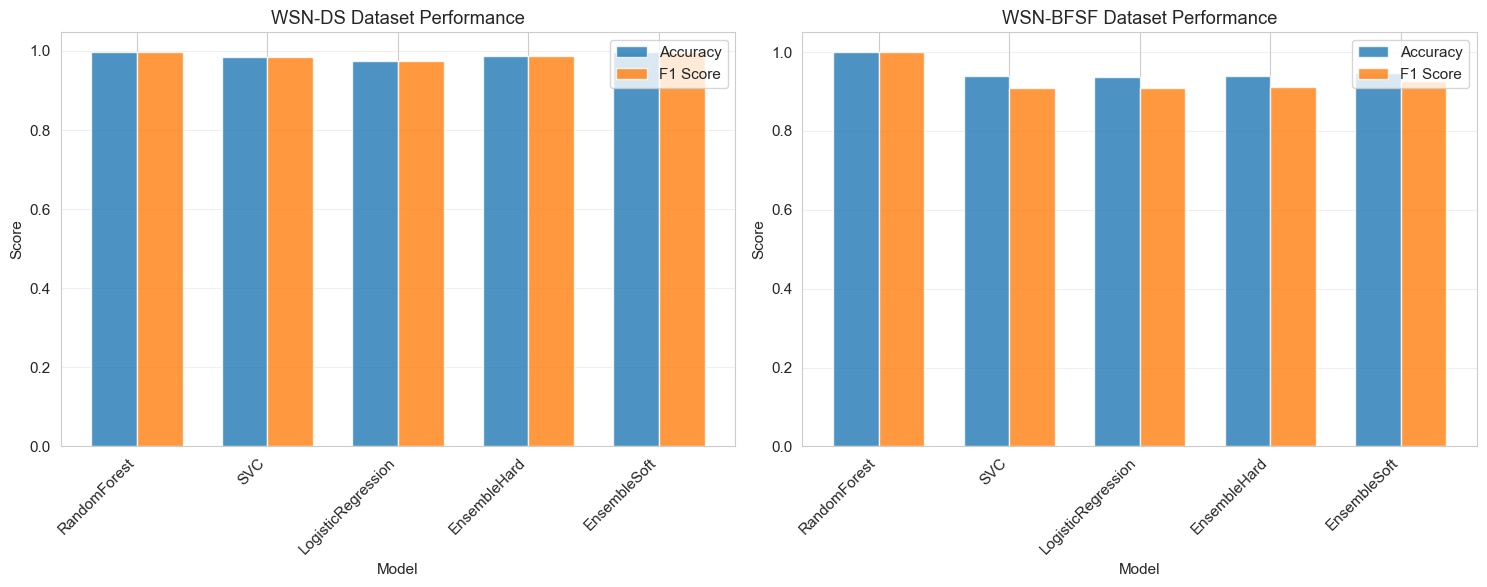

In [13]:
# Compare ensemble methods vs base models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# WSN-DS
ax1 = axes[0]
x = np.arange(len(wsn_ds_metrics))
width = 0.35
ax1.bar(x - width/2, wsn_ds_metrics['Accuracy'], width, label='Accuracy', alpha=0.8)
ax1.bar(x + width/2, wsn_ds_metrics['F1'], width, label='F1 Score', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Score')
ax1.set_title('WSN-DS Dataset Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(wsn_ds_metrics['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# WSN-BFSF
ax2 = axes[1]
x = np.arange(len(wsn_bfsf_metrics))
ax2.bar(x - width/2, wsn_bfsf_metrics['Accuracy'], width, label='Accuracy', alpha=0.8)
ax2.bar(x + width/2, wsn_bfsf_metrics['F1'], width, label='F1 Score', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('WSN-BFSF Dataset Performance')
ax2.set_xticks(x)
ax2.set_xticklabels(wsn_bfsf_metrics['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Ensemble vs Base Models

Ensemble Method Comparison:
 Dataset      Method  Accuracy
  WSN-DS Hard Voting  0.988310
  WSN-DS Soft Voting  0.996423
WSN-BFSF Hard Voting  0.939188
WSN-BFSF Soft Voting  0.948031


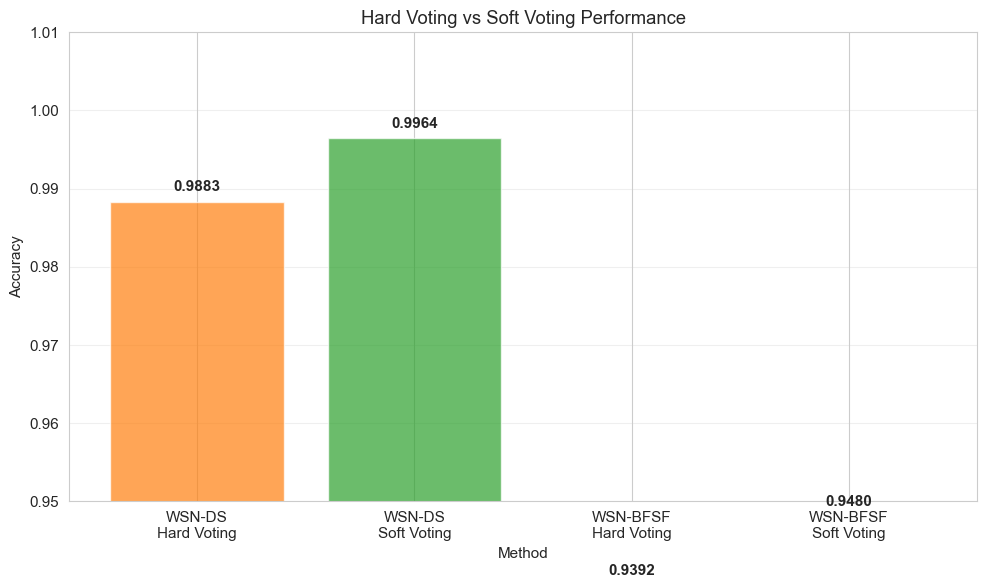

In [14]:
# Compare ensemble methods
ensemble_comparison = pd.DataFrame({
    'Dataset': ['WSN-DS', 'WSN-DS', 'WSN-BFSF', 'WSN-BFSF'],
    'Method': ['Hard Voting', 'Soft Voting', 'Hard Voting', 'Soft Voting'],
    'Accuracy': [
        wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleHard']['Accuracy'].values[0],
        wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleSoft']['Accuracy'].values[0],
        wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleHard']['Accuracy'].values[0],
        wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleSoft']['Accuracy'].values[0]
    ]
})

print("Ensemble Method Comparison:")
print(ensemble_comparison.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
x = np.arange(len(ensemble_comparison))
colors = ['#ff7f0e', '#2ca02c', '#ff7f0e', '#2ca02c']
plt.bar(x, ensemble_comparison['Accuracy'], color=colors, alpha=0.7)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Hard Voting vs Soft Voting Performance')
plt.xticks(x, [f"{row['Dataset']}\n{row['Method']}" for _, row in ensemble_comparison.iterrows()], rotation=0)
plt.ylim(0.95, 1.01)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(ensemble_comparison['Accuracy']):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Confusion Matrices

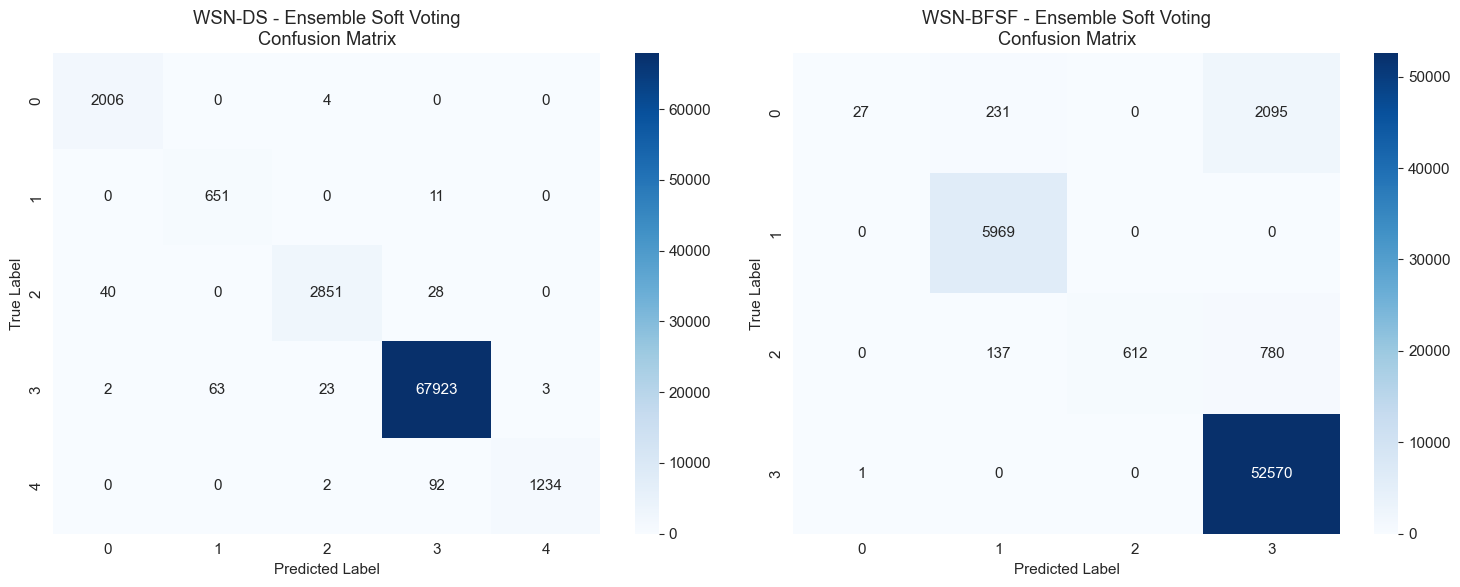

In [15]:
# Load confusion matrices for best models (EnsembleSoft)
cm_wsn_ds = pd.read_csv('outputs/WSN-DS_EnsembleSoft_confusion_matrix.csv')
cm_wsn_bfsf = pd.read_csv('outputs/WSN-BFSF_EnsembleSoft_confusion_matrix.csv')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# WSN-DS
sns.heatmap(cm_wsn_ds, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True)
axes[0].set_title('WSN-DS - Ensemble Soft Voting\nConfusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# WSN-BFSF
sns.heatmap(cm_wsn_bfsf, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=True)
axes[1].set_title('WSN-BFSF - Ensemble Soft Voting\nConfusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

## 5. Detailed Classification Reports

In [16]:
# Load detailed classification reports
print("="*60)
print("WSN-DS - Ensemble Soft Voting Classification Report")
print("="*60)
with open('outputs/WSN-DS_EnsembleSoft_report.txt', 'r') as f:
    print(f.read())

print("\n" + "="*60)
print("WSN-BFSF - Ensemble Soft Voting Classification Report")
print("="*60)
with open('outputs/WSN-BFSF_EnsembleSoft_report.txt', 'r') as f:
    print(f.read())

WSN-DS - Ensemble Soft Voting Classification Report
Model: EnsembleSoft
Dataset: WSN-DS

              precision    recall  f1-score   support

   Blackhole       0.98      1.00      0.99      2010
    Flooding       0.91      0.98      0.95       662
    Grayhole       0.99      0.98      0.98      2919
      Normal       1.00      1.00      1.00     68014
        TDMA       1.00      0.93      0.96      1328

    accuracy                           1.00     74933
   macro avg       0.98      0.98      0.98     74933
weighted avg       1.00      1.00      1.00     74933


WSN-BFSF - Ensemble Soft Voting Classification Report
Model: EnsembleSoft
Dataset: WSN-BFSF

              precision    recall  f1-score   support

   Blackhole       0.96      0.01      0.02      2353
    Flooding       0.94      1.00      0.97      5969
  Forwarding       1.00      0.40      0.57      1529
      normal       0.95      1.00      0.97     52571

    accuracy                           0.95     62422
  

## 6. Performance Metrics Summary

In [17]:
# Create comprehensive summary table
summary = pd.DataFrame([
    {
        'Dataset': 'WSN-DS',
        'Best Model': 'EnsembleSoft',
        'Accuracy': wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleSoft']['Accuracy'].values[0],
        'Precision': wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleSoft']['Precision'].values[0],
        'Recall': wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleSoft']['Recall'].values[0],
        'F1': wsn_ds_metrics[wsn_ds_metrics['Model'] == 'EnsembleSoft']['F1'].values[0]
    },
    {
        'Dataset': 'WSN-BFSF',
        'Best Model': 'EnsembleSoft',
        'Accuracy': wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleSoft']['Accuracy'].values[0],
        'Precision': wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleSoft']['Precision'].values[0],
        'Recall': wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleSoft']['Recall'].values[0],
        'F1': wsn_bfsf_metrics[wsn_bfsf_metrics['Model'] == 'EnsembleSoft']['F1'].values[0]
    }
])

print("\nBest Model Performance Summary:")
print("="*60)
print(summary.to_string(index=False))
print("="*60)


Best Model Performance Summary:
 Dataset   Best Model  Accuracy  Precision   Recall       F1
  WSN-DS EnsembleSoft  0.996423   0.996488 0.996423 0.996418
WSN-BFSF EnsembleSoft  0.948031   0.949431 0.948031 0.927385


/var/folders/ts/5lrll2nx1511bvwlbt5yh_940000gn/T/ipykernel_82105/2371142900.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_wsn_ds['Model'], rotation=45, ha='right')
/var/folders/ts/5lrll2nx1511bvwlbt5yh_940000gn/T/ipykernel_82105/2371142900.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(metrics_wsn_bfsf['Model'], rotation=45, ha='right')
/var/folders/ts/5lrll2nx1511bvwlbt5yh_940000gn/T/ipykernel_82105/2371142900.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_wsn_ds['Model'], rotation=45, ha='right')
/var/folders/ts/5lrll2nx1511bvwlbt5yh_940000gn/T/ipykernel_82105/2371142900.py:30: UserWarning: set_ticklabels() should only be used with a fixed numbe

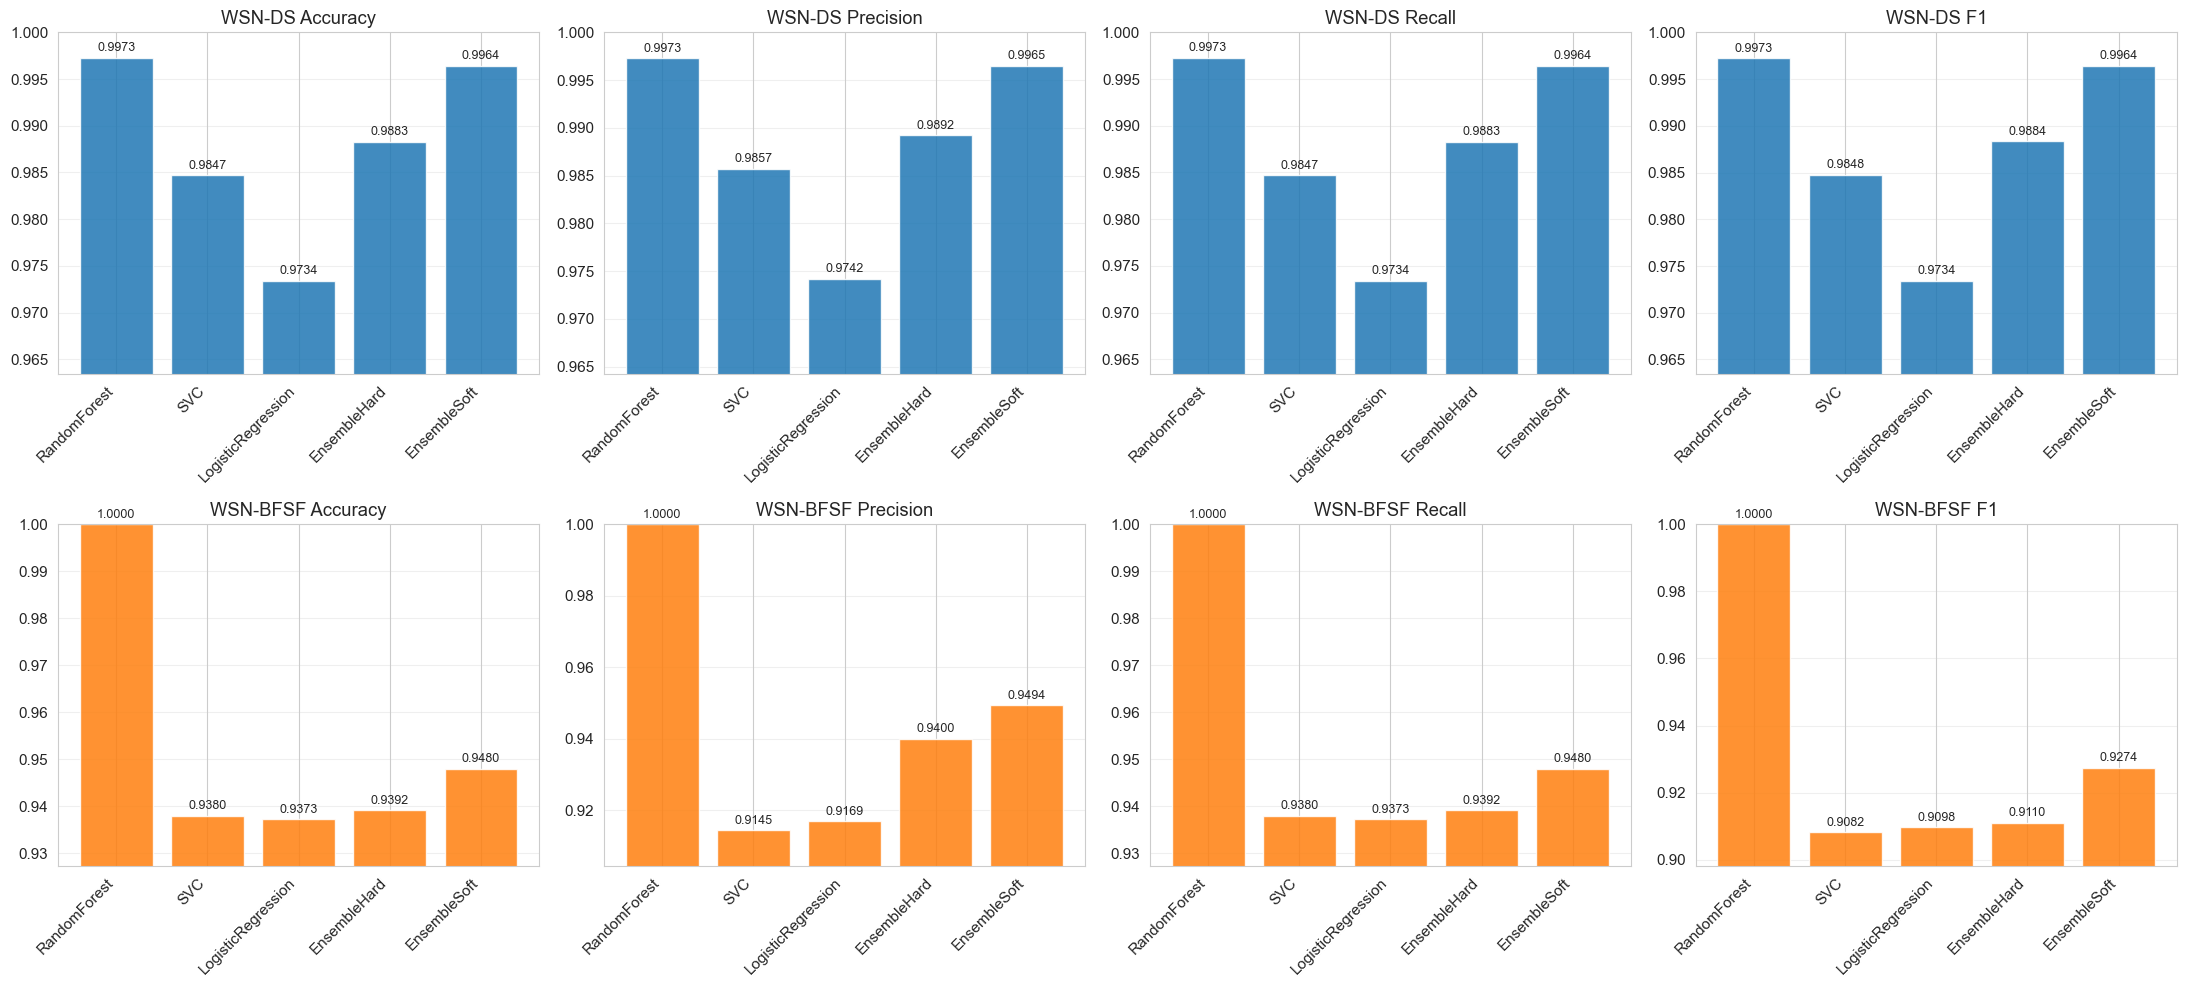

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

metrics_wsn_ds = pd.read_csv('outputs/WSN-DS_metrics.csv')
metrics_wsn_bfsf = pd.read_csv('outputs/WSN-BFSF_metrics.csv')

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metric_names):
    # WSN-DS
    ax = axes[0, i]
    values_ds = metrics_wsn_ds[metric].values
    ax.bar(metrics_wsn_ds['Model'], values_ds, color='#1f77b4', alpha=0.85)
    ax.set_title(f'WSN-DS {metric}')
    ax.set_xticklabels(metrics_wsn_ds['Model'], rotation=45, ha='right')
    ymin_ds = max(values_ds.min() - 0.01, 0.0)
    ymax_ds = min(values_ds.max() + 0.005, 1.0)
    ax.set_ylim(ymin_ds, ymax_ds)
    for x, v in enumerate(values_ds):
        ax.text(x, v + (ymax_ds - ymin_ds)*0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # WSN-BFSF
    ax2 = axes[1, i]
    values_bfsf = metrics_wsn_bfsf[metric].values
    ax2.bar(metrics_wsn_bfsf['Model'], values_bfsf, color='#ff7f0e', alpha=0.85)
    ax2.set_title(f'WSN-BFSF {metric}')
    ax2.set_xticklabels(metrics_wsn_bfsf['Model'], rotation=45, ha='right')
    ymin_bfsf = max(values_bfsf.min() - 0.01, 0.0)
    ymax_bfsf = min(values_bfsf.max() + 0.005, 1.0)
    ax2.set_ylim(ymin_bfsf, ymax_bfsf)
    for x, v in enumerate(values_bfsf):
        ax2.text(x, v + (ymax_bfsf - ymin_bfsf)*0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
    ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


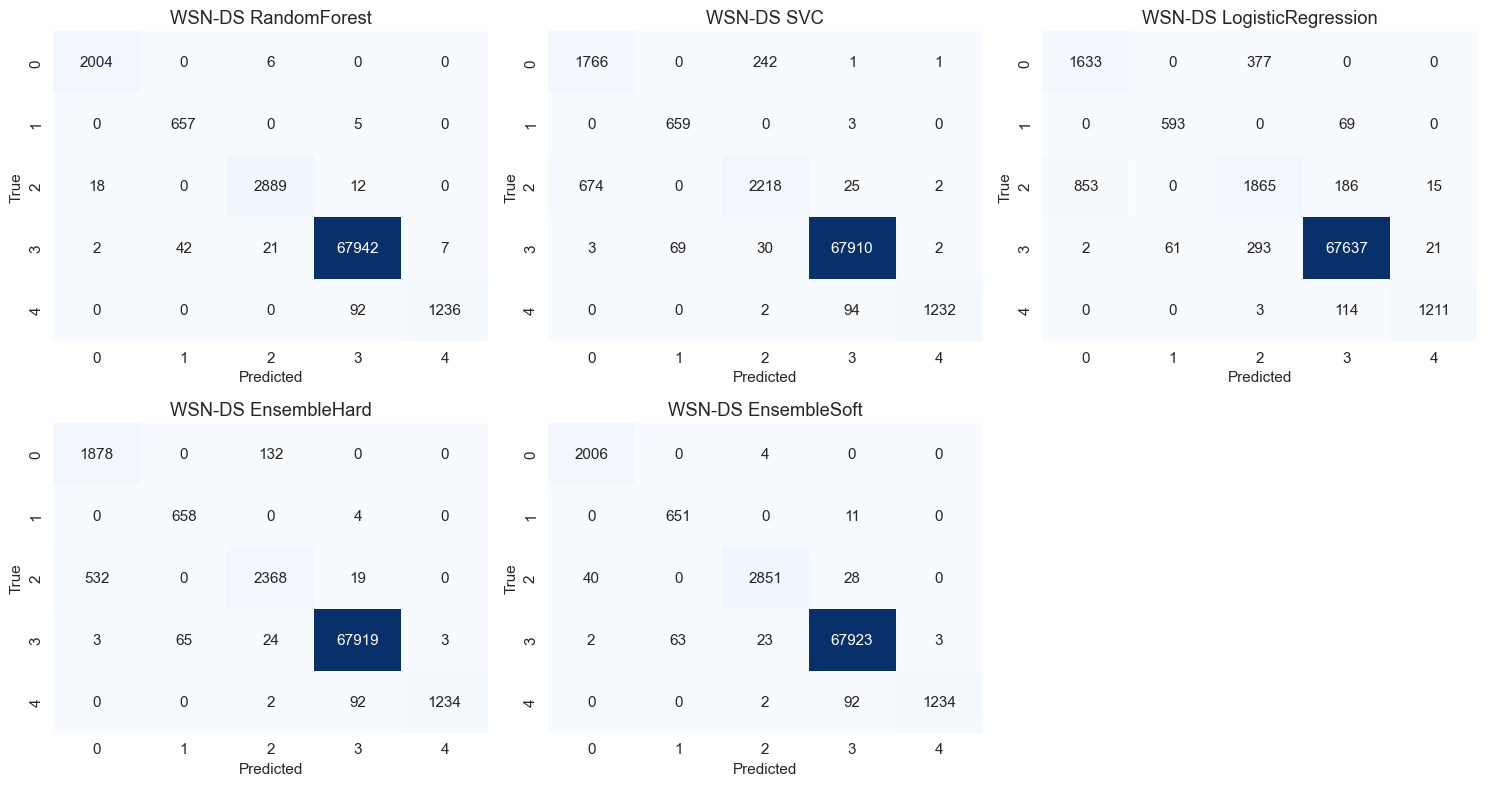

In [19]:
models = metrics_wsn_ds['Model'].tolist()
cm_files_ds = {m: f'outputs/WSN-DS_{m}_confusion_matrix.csv' for m in models}

n = len(models)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for idx, m in enumerate(models):
    cm = pd.read_csv(cm_files_ds[m]).values
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'WSN-DS {m}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


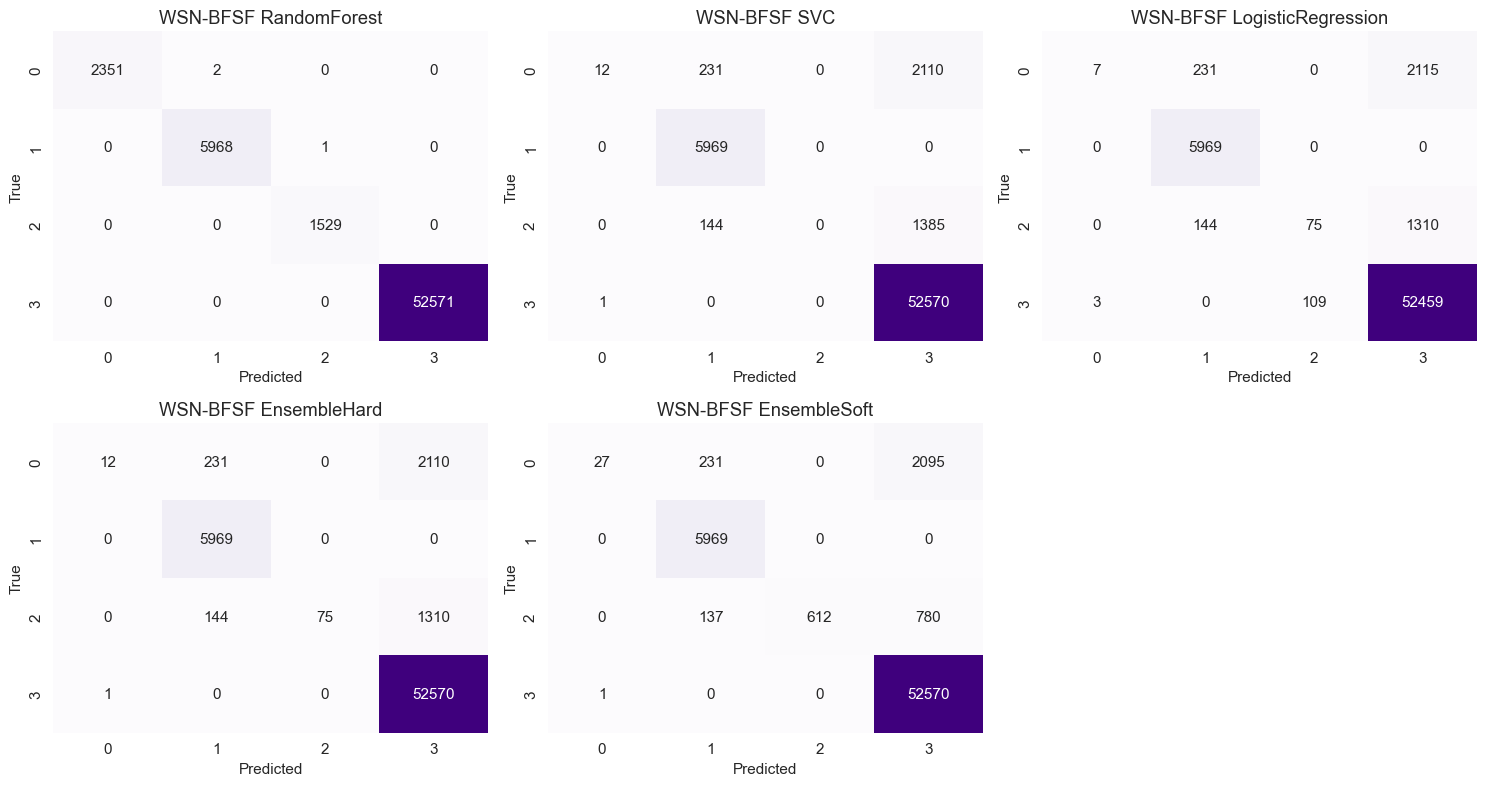

In [20]:
# 10. Confusion matrices for all models (WSN-BFSF)
cm_files_bfsf = {m: f'outputs/WSN-BFSF_{m}_confusion_matrix.csv' for m in models}

n = len(models)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

for idx, m in enumerate(models):
    cm = pd.read_csv(cm_files_bfsf[m]).values
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False, ax=ax)
    ax.set_title(f'WSN-BFSF {m}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
